# 코로나 시각화

### 교회와 연관성 ?


참고

http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do

In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# OPEN API
# 이건 실제로 사용은 안함
key = json.load(open('secrets.json'))['Key']['Seoul']
start = 0
end = 5

URL = f"http://openapi.seoul.go.kr:8088/{key}/json/Corona19Status/{start}/{end}"
data = requests.get(URL).json()
p_lst = data['Corona19Status']['row']
df = pd.DataFrame(p_lst)
df

,CORONA19_ID,CORONA19_DATE,CORONA19_NO,CORONA19_COUNTRY,CORONA19_PERSONAL,CORONA19_AREA,CORONA19_TRAVEL_HISTORY,CORONA19_CONTACT_HISTORY,CORONA19_CORRECTIVE,CORONA19_LEAVE_STATUS,CORONA19_MOVING_PATH,CORONA19_IDATE,CORONA19_MDATE
0,1,1.24.,2,,,강서구,중국 우한시,해외 접촉,,퇴원,이동경로 공개기간 경과,2020-09-03 11:11:04,2020-09-04 10:30:01
1,2,1.30.,5,,,중랑구,중국 우한시,해외 접촉,,퇴원,이동경로 공개기간 경과,2020-09-03 11:11:04,2020-09-04 10:30:01
2,3,1.30.,6,,,종로구,,#3 접촉,,퇴원,이동경로 공개기간 경과,2020-09-03 11:11:04,2020-09-04 10:30:01
3,4,1.30.,7,,,마포구,중국 우한시,해외 접촉,,퇴원,이동경로 공개기간 경과,2020-09-03 11:11:04,2020-09-04 10:30:01
4,5,1.31.,9,,,성북구,,#5 접촉,,퇴원,이동경로 공개기간 경과,2020-09-03 11:11:04,2020-09-04 10:30:01


In [3]:
# data sheet
df = pd.read_csv('../input/서울시 코로나19 확진자 현황.csv', engine='python')
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,3961,8.31.,18223,NaN,NaN,기타,NaN,동작구 카드발급 업체 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
1,3960,8.31.,18896,NaN,NaN,기타,NaN,동작구 카드발급 업체 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
2,3959,8.31.,미부여,NaN,NaN,도봉구,NaN,도봉구 체육시설 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
3,3958,8.31.,20163,NaN,NaN,양천구,NaN,확인 중,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
4,3957,8.31.,20141,NaN,NaN,은평구,NaN,확인 중,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,5,1.31.,#9,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3957,4,1.30.,#7,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3958,3,1.30.,#6,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3959,2,1.30.,#5,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      3961 non-null   int64  
 1   확진일     3961 non-null   object 
 2   환자번호    3955 non-null   object 
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      3961 non-null   object 
 6   여행력     392 non-null    object 
 7   접촉력     3961 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      2024 non-null   object 
 10  이동경로    3710 non-null   object 
 11  등록일     3961 non-null   object 
 12  수정일     3961 non-null   object 
 13  노출여부    3961 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 433.4+ KB


In [5]:
df.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

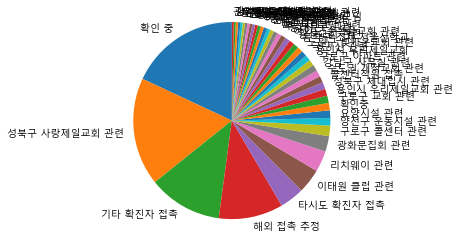

In [6]:
# 전체적인 비율 파악을 위해 pie 차트 사용
# 10개 이상 만 확인
contact = df['접촉력'].value_counts()
contact_10 = contact[contact > 10]

plt.pie(contact_10, labels=contact_10.index, startangle=90,)
plt.axis('equal')
plt.show()

In [7]:
# 접촉력에는 어떤 값들이 있는지 확인
# 실제 사용을 한다면 데이터 전처리 필요 - 묶을꺼는 묶어야 함
df['접촉력'].unique()

array(['동작구 카드발급 업체 관련', '도봉구 체육시설 관련', '확인 중', '노원구 교회 관련', '기타 확진자 접촉',
       '제주 게스트하우스 관련', '성북구 사랑제일교회 관련', '노원구 빛가온교회 관련', '성북구 요양시설 관련',
       '타시도 확진자 접촉', '해외 접촉 추정', '강동구 병원 관련', '순복음 강북교회', '동대문구 sk탁구클럽',
       '광화문집회 관련', '동작구 스터디카페', '극단 산 관련', '성북구 체대입시 관련', 'KT가좌지사 관련',
       '확인 중\u3000', '성북구 사랑제일교회', '롯데리아 종사자 모임', '타시도확진자 접촉',
       '영등포구 권능교회', '동작구 소재 서울신학교', '군인권센터', '동작구 요양시설 관련',
       '용인시 우리제일교회 관련', '동대문구 SK탁구클럽', '여의도 순복음교회 관련', '구로구 아파트 관련',
       '중구 보험회사(현대해상)', '영등포구 권능교회 관련', '강서구 병원관련', '마포구소재 군관련 사무실',
       '강동구 병원관련', '종로구 혜화경찰서 관련', '양천구 되새김교회 관련', '현대커머셜', '녹색병원 관련',
       '다래경매 관련', '영등포 IFC몰 오케스트로', '고양시 반석교회(케네디상가) 관련', '롯데 자산개발 관련',
       '골드트레인', '한양대병원', '은평구 헤어콕 관련', '강동구 어린이집', '은평구 성경공부모임',
       '관악구 요양병원', '고대 안암병원 관련', '마포구 푸본생명콜센터', '성동구 가족관련', '용인시 우리제일교회',
       '골드트레인 관련', '양천구 되새김 교회', '고양시 반석교회(케네디상가)', '중구 통일상가',
       '고양시 반석교회 관련 (케네디상가)', '강남구 판매업소(골드트레인)', '양천구 되새김교회',
       '양천구 확진자 접촉', '영등포구 확진자 접촉', '강남구 확진

In [8]:
# 교회 라는 단어가 들어간 접촉력만 모아서 확인
contact = df['접촉력'].value_counts()
church = []
for i in contact.index:
    if '교회' in i:
        church.append(i)
church

['성북구 사랑제일교회 관련',
 '구로구 교회 관련',
 '용인시 우리제일교회 관련',
 '수도권 개척교회 관련',
 '용인시 우리제일교회',
 '노원구 빛가온교회 관련',
 '왕성교회 관련',
 '여의도 순복음교회 관련',
 '순복음 강북교회',
 '송파구 교회관련',
 '영등포구 권능교회',
 '고양시 반석교회 관련(케네디상가)',
 '한국대학생선교회 관련',
 '양천구 되새김교회 관련',
 '강남구 동인교회 관련',
 '양천구 되새김 교회',
 '선교회 소모임',
 '노원구 교회 관련',
 '명성교회 관련',
 '대전 꿈꾸는 교회',
 '양천구 되새김교회',
 '성북구 사랑제일교회',
 '영등포구 권능교회 관련',
 '대구 방문(명성교회)',
 '고양시 반석교회(케네디상가)',
 '고양시 반석교회(케네디상가) 관련',
 '신천지대구교회 관련',
 '고양시 반석교회 관련 (케네디상가)']

In [9]:
# 위에서 구한 교회 리스트를 이용해서 
# 접촉력의 값들 중 교회 리스트 안에 값이 있으면 출력 - isin() 사용
church_peoples = df[df['접촉력'].isin(church)]
church_peoples

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
6,3955,8.31.,미부여,NaN,NaN,강북구,NaN,노원구 교회 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
12,3949,8.31.,20074,NaN,NaN,노원구,NaN,노원구 교회 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
13,3948,8.31.,20092,NaN,NaN,노원구,NaN,노원구 교회 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
17,3944,8.31.,20083,NaN,NaN,노원구,NaN,성북구 사랑제일교회 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
23,3938,8.31.,미부여,NaN,NaN,종로구,NaN,노원구 빛가온교회 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,353,3.25.,#9187,NaN,NaN,금천구,NaN,구로구 교회 관련,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:12,2020-09-02 09:12:12,Y
3889,72,2.27.,#2833,NaN,NaN,강동구,NaN,명성교회 관련,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3914,47,2.26.,#1247,NaN,NaN,강남구,NaN,신천지대구교회 관련,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3915,46,2.25.,#1246,NaN,NaN,경북,NaN,명성교회 관련,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y


In [10]:
# 서울 전체 감염자 중 교회 관련 비율 - 나중엔 그래프로 시각화
# 우선 숫자로 대충 확인
958 / 3961 * 100

24.18581166372128

In [11]:
# 교회 관련 확진자 수
sr = church_peoples['접촉력'].value_counts()
sr

성북구 사랑제일교회 관련          613
구로구 교회 관련               41
용인시 우리제일교회 관련           40
수도권 개척교회 관련             37
용인시 우리제일교회              33
노원구 빛가온교회 관련            31
왕성교회 관련                 30
여의도 순복음교회 관련            28
순복음 강북교회                19
송파구 교회관련                19
영등포구 권능교회               15
고양시 반석교회 관련(케네디상가)       9
한국대학생선교회 관련              7
양천구 되새김교회 관련             6
강남구 동인교회 관련              6
양천구 되새김 교회               5
선교회 소모임                  4
노원구 교회 관련                3
명성교회 관련                  2
대전 꿈꾸는 교회                2
양천구 되새김교회                1
대구 방문(명성교회)              1
영등포구 권능교회 관련             1
신천지대구교회 관련               1
고양시 반석교회(케네디상가)          1
고양시 반석교회(케네디상가) 관련       1
고양시 반석교회 관련 (케네디상가)      1
성북구 사랑제일교회               1
Name: 접촉력, dtype: int64

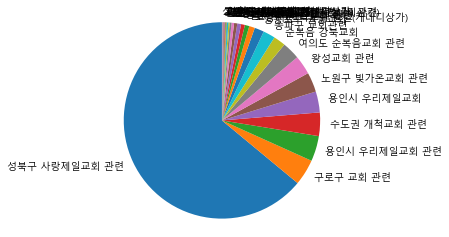

In [12]:
# pie 차트로 확인
plt.pie(sr, labels=sr.index, startangle=90,)
plt.axis('equal')
plt.show()

In [13]:

'''
결측치 시각화

할 수 있는거
- 교회에 대한 sns 키워드 분석

- 전체 확진자 중 교회 관련은 어느 정도의 비율 ?
- 월별 교회 관련 증가율 시각화
- 교회 관련자들의 연령대 or 성별 시각화

- 다른 종교(절, 성당) 관련 확진자에 관한 시각화 ?

- 다른 지역의 데이터를 찾으면 그것과 비교 -- 교회가 문제인지, 서울에 있는 교회가 문제인지
'''

'\n결측치 시각화\n\n할 수 있는거\n- 교회에 대한 sns 키워드 분석\n\n- 전체 확진자 중 교회 관련은 어느 정도의 비율 ?\n- 월별 교회 관련 증가율 시각화\n- 교회 관련자들의 연령대 or 성별 시각화\n\n- 다른 종교(절, 성당) 관련 확진자에 관한 시각화 ?\n\n- 다른 지역의 데이터를 찾으면 그것과 비교 -- 교회가 문제인지, 서울에 있는 교회가 문제인지\n'

In [14]:
# 접촉 관련 정보는 접촉이라고 이름 변경
contact = df['접촉력'].value_counts()
touch = []
for i in contact.index:
    if '접촉' in i:
        touch.append(i)

mask = df['접촉력'].isin(touch)
df.loc[mask, '접촉력'] = '접촉'
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,3961,8.31.,18223,NaN,NaN,기타,NaN,동작구 카드발급 업체 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
1,3960,8.31.,18896,NaN,NaN,기타,NaN,동작구 카드발급 업체 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
2,3959,8.31.,미부여,NaN,NaN,도봉구,NaN,도봉구 체육시설 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
3,3958,8.31.,20163,NaN,NaN,양천구,NaN,확인 중,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
4,3957,8.31.,20141,NaN,NaN,은평구,NaN,확인 중,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,5,1.31.,#9,NaN,NaN,성북구,NaN,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3957,4,1.30.,#7,NaN,NaN,마포구,중국 우한시,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3958,3,1.30.,#6,NaN,NaN,종로구,NaN,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3959,2,1.30.,#5,NaN,NaN,중랑구,중국 우한시,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y


In [15]:
# 접촉이라는 단어가 들어가는 '접촉력' 의 경우
# 엄청 많다
# 나중에 정리를 해야함 - 그냥 사용하기에는 좋지 않음
touch

['기타 확진자 접촉',
 '해외 접촉 추정',
 '타시도 확진자 접촉',
 '콜센터직원 접촉',
 '해외 접촉',
 '관악구 확진자 접촉',
 '타시도확진자 접촉',
 '송파구 확진자 접촉',
 '영등포구 확진자 접촉',
 '강남구 확진자 접촉',
 '구로구 확진자 접촉',
 '강서구 확진자 접촉',
 '은평구 확진자 접촉',
 '#9734 접촉',
 '성북구 확진자 접촉',
 '양천구 확진자 접촉',
 '#8271 접촉',
 '종로구 확진자 접촉',
 '#8486 접촉',
 '#780 접촉(추정)',
 '서초구 확진자 접촉',
 '동작구 확진자 접촉',
 '대구 확진자 접촉',
 '#8791 접촉',
 '#14483 접촉',
 '#6 접촉',
 '용산구 확진자 접촉',
 '#6832 접촉자',
 '#10044 접촉',
 '#9287 접촉',
 '#7923 접촉',
 '타시도 확진자 접촉(추정)',
 '#8063 접촉',
 '광진구 확진자 접촉',
 '#9525 접촉',
 '마포구 확진자 접촉',
 '중구 확진자 접촉',
 '#8245 접촉',
 '#8669 접촉',
 '#8717 접촉',
 '금천구 확진자 접촉',
 '#56 접촉',
 '#9641 접촉',
 '#3 접촉',
 '#8646 접촉',
 '#8709 접촉 추정',
 '#6921접촉자',
 '#2621번 접촉',
 '#7914 접촉',
 '#8196 접촉',
 '강북구 확진자 접촉',
 '#8044 접촉',
 '#10115 접촉',
 '#8079 접촉',
 '해외접촉 추정',
 '#8057 접촉',
 '#8138 접촉',
 '구로구 콜센터 접촉',
 '#10054 접촉',
 '#10015 접촉',
 '#11196 접촉',
 '#1247 접촉(추정)',
 '#9020 접촉',
 '#9219 접촉',
 '#7280 접촉(추정)',
 '#9364 접촉',
 '#136 접촉',
 '#794 접촉(추정)',
 '#9800 접촉',
 '#10084 접촉',
 '#8881 접촉 추정',
 '#9946 접촉',

In [16]:
# 교회 관련을 교회로 묶음
contact = df['접촉력'].value_counts()
church = []
for i in contact.index:
    if '교회' in i:
        church.append(i)

mask = df['접촉력'].isin(church)
df.loc[mask, '접촉력'] = '교회'
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,3961,8.31.,18223,NaN,NaN,기타,NaN,동작구 카드발급 업체 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
1,3960,8.31.,18896,NaN,NaN,기타,NaN,동작구 카드발급 업체 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
2,3959,8.31.,미부여,NaN,NaN,도봉구,NaN,도봉구 체육시설 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
3,3958,8.31.,20163,NaN,NaN,양천구,NaN,확인 중,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
4,3957,8.31.,20141,NaN,NaN,은평구,NaN,확인 중,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,5,1.31.,#9,NaN,NaN,성북구,NaN,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3957,4,1.30.,#7,NaN,NaN,마포구,중국 우한시,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3958,3,1.30.,#6,NaN,NaN,종로구,NaN,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3959,2,1.30.,#5,NaN,NaN,중랑구,중국 우한시,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y


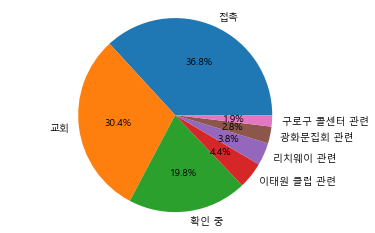

In [17]:
# 50개 이상 만
contact = df['접촉력'].value_counts()
contact_10 = contact[contact > 50]

plt.pie(contact_10, labels=contact_10.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [18]:
# 요일별
df

# 확진일을 이용해서 월 column 만들기
df['확진일'].values

lst = []
for val in df['확진일'].values:
    # print(val)
    lst.append(val[0])

np.array(lst)

df['월'] = np.array(lst)

In [19]:
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,월
0,3961,8.31.,18223,NaN,NaN,기타,NaN,동작구 카드발급 업체 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y,8
1,3960,8.31.,18896,NaN,NaN,기타,NaN,동작구 카드발급 업체 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y,8
2,3959,8.31.,미부여,NaN,NaN,도봉구,NaN,도봉구 체육시설 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y,8
3,3958,8.31.,20163,NaN,NaN,양천구,NaN,확인 중,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y,8
4,3957,8.31.,20141,NaN,NaN,은평구,NaN,확인 중,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,5,1.31.,#9,NaN,NaN,성북구,NaN,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y,1
3957,4,1.30.,#7,NaN,NaN,마포구,중국 우한시,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y,1
3958,3,1.30.,#6,NaN,NaN,종로구,NaN,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y,1
3959,2,1.30.,#5,NaN,NaN,중랑구,중국 우한시,접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y,1


In [20]:
# 전체 수
df['월'].value_counts().sum()

# 월
df['월'].unique()

array(['8', '7', '6', '5', '4', '3', '2', '1'], dtype=object)

In [21]:
# 월별 전체 확진자 수
sr = df.groupby(['월']).환자번호.count()
sr

월
1       7
2      80
3     391
4     156
5     228
6     460
7     281
8    2352
Name: 환자번호, dtype: int64

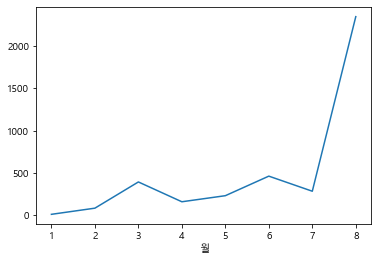

In [22]:
# 월별 확진자수 그래프
sr.plot()
plt.show()

In [23]:
# 월별 교회 관련 확진자 수
sr_church = df[df['접촉력'] == '교회'].groupby(['월']).환자번호.count()
sr_church['1'] = 0
sr_church = sr_church.sort_index()
sr_church

월
1      0
2      4
3     35
4      6
5     10
6     67
7     25
8    809
Name: 환자번호, dtype: int64

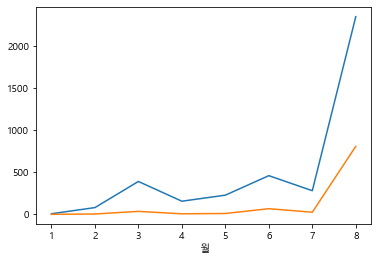

In [24]:
# 전체 확진자 증가와 교회 관련 환진자 증가를 보여주는 그래프
sr.plot()
sr_church.plot()

plt.show()

In [25]:
# 월별 접촉 관련 확진자 수
sr_touch = df[df['접촉력'] == '접촉'].groupby(['월']).환자번호.count()
sr_touch

월
1      7
2     33
3    226
4    141
5     27
6     47
7     89
8    588
Name: 환자번호, dtype: int64

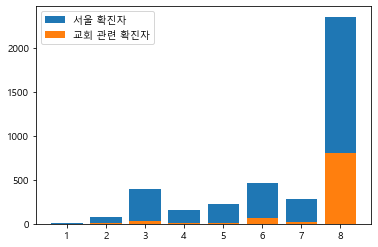

In [28]:
# bar 그래프로 시각화
plt.subplot()
plt.bar(sr.index, sr, label="서울 확진자")
plt.bar(sr_church.index, sr_church, label="교회 관련 확진자")
plt.legend()
plt.show()

In [ ]:
# 우선은 여기까지
# 다른 파일에서 이어서 진행함